In [71]:
import csv
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

plt.style.use("ggplot")

from sklearn import svm
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [72]:
data_path = "Desktop/DontGetKicked/training.csv"
dataframefeatures = pd.read_csv(data_path)
dataframefeatures


c:\python\python38-32\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (0,1,4,5,12,14,18,19,20,21,22,23,24,25,28,29,31,32,33) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33
0,RefId,IsBadBuy,PurchDate,Auction,VehYear,VehicleAge,Make,Model,Trim,SubModel,...,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,PRIMEUNIT,AUCGUART,BYRNO,VNZIP1,VNST,VehBCost,IsOnlineSale,WarrantyCost
1,1,0,12/7/2009,ADESA,2006,3,MAZDA,MAZDA3,i,4D SEDAN I,...,11597,12409,NaN,NaN,21973,33619,FL,7100,0,1113
2,2,0,12/7/2009,ADESA,2004,5,DODGE,1500 RAM PICKUP 2WD,ST,QUAD CAB 4.7L SLT,...,11374,12791,NaN,NaN,19638,33619,FL,7600,0,1053
3,3,0,12/7/2009,ADESA,2005,4,DODGE,STRATUS V6,SXT,4D SEDAN SXT FFV,...,7146,8702,NaN,NaN,19638,33619,FL,4900,0,1389
4,4,0,12/7/2009,ADESA,2004,5,DODGE,NEON,SXT,4D SEDAN,...,4375,5518,NaN,NaN,19638,33619,FL,4100,0,630
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72979,73010,1,12/2/2009,ADESA,2001,8,MERCURY,SABLE,GS,4D SEDAN GS,...,4836,5937,NaN,NaN,18111,30212,GA,4200,0,993
72980,73011,0,12/2/2009,ADESA,2007,2,CHEVROLET,MALIBU 4C,LS,4D SEDAN LS,...,10151,11652,NaN,NaN,18881,30212,GA,6200,0,1038
72981,73012,0,12/2/2009,ADESA,2005,4,JEEP,GRAND CHEROKEE 2WD V,Lar,4D WAGON LAREDO,...,11831,14402,NaN,NaN,18111,30212,GA,8200,0,1893
72982,73013,0,12/2/2009,ADESA,2006,3,CHEVROLET,IMPALA,LS,4D SEDAN LS,...,10099,11228,NaN,NaN,18881,30212,GA,7000,0,1974


In [59]:
print(dataframefeatures.columns[1])
dataframetarget = dataframefeatures.pop(dataframefeatures.columns[1])
dataframetarget



IsBadBuy


0        0
1        0
2        0
3        0
4        0
        ..
72978    1
72979    0
72980    0
72981    0
72982    0
Name: IsBadBuy, Length: 72983, dtype: int64

In [60]:
dataframefeatures = dataframefeatures.drop(columns = "RefId")
dataframefeatures

,PurchDate,Auction,VehYear,VehicleAge,Make,Model,Trim,SubModel,Color,Transmission,...,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,PRIMEUNIT,AUCGUART,BYRNO,VNZIP1,VNST,VehBCost,IsOnlineSale,WarrantyCost
0,12/7/2009,ADESA,2006,3,MAZDA,MAZDA3,i,4D SEDAN I,RED,AUTO,...,11597.0,12409.0,NaN,NaN,21973,33619,FL,7100.0,0,1113
1,12/7/2009,ADESA,2004,5,DODGE,1500 RAM PICKUP 2WD,ST,QUAD CAB 4.7L SLT,WHITE,AUTO,...,11374.0,12791.0,NaN,NaN,19638,33619,FL,7600.0,0,1053
2,12/7/2009,ADESA,2005,4,DODGE,STRATUS V6,SXT,4D SEDAN SXT FFV,MAROON,AUTO,...,7146.0,8702.0,NaN,NaN,19638,33619,FL,4900.0,0,1389
3,12/7/2009,ADESA,2004,5,DODGE,NEON,SXT,4D SEDAN,SILVER,AUTO,...,4375.0,5518.0,NaN,NaN,19638,33619,FL,4100.0,0,630
4,12/7/2009,ADESA,2005,4,FORD,FOCUS,ZX3,2D COUPE ZX3,SILVER,MANUAL,...,6739.0,7911.0,NaN,NaN,19638,33619,FL,4000.0,0,1020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72978,12/2/2009,ADESA,2001,8,MERCURY,SABLE,GS,4D SEDAN GS,BLACK,AUTO,...,4836.0,5937.0,NaN,NaN,18111,30212,GA,4200.0,0,993
72979,12/2/2009,ADESA,2007,2,CHEVROLET,MALIBU 4C,LS,4D SEDAN LS,SILVER,AUTO,...,10151.0,11652.0,NaN,NaN,18881,30212,GA,6200.0,0,1038
72980,12/2/2009,ADESA,2005,4,JEEP,GRAND CHEROKEE 2WD V,Lar,4D WAGON LAREDO,SILVER,AUTO,...,11831.0,14402.0,NaN,NaN,18111,30212,GA,8200.0,0,1893
72981,12/2/2009,ADESA,2006,3,CHEVROLET,IMPALA,LS,4D SEDAN LS,WHITE,AUTO,...,10099.0,11228.0,NaN,NaN,18881,30212,GA,7000.0,0,1974


In [61]:
X_train, X_test, y_train, y_test = train_test_split(dataframefeatures, dataframetarget, test_size = 0.2, random_state = 21, stratify = dataframetarget)

In [62]:
X_train

,PurchDate,Auction,VehYear,VehicleAge,Make,Model,Trim,SubModel,Color,Transmission,...,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,PRIMEUNIT,AUCGUART,BYRNO,VNZIP1,VNST,VehBCost,IsOnlineSale,WarrantyCost
56909,10/6/2009,MANHEIM,2005,4,PONTIAC,GRAND PRIX 3.8L V6 S,Bas,4D SEDAN,GREY,AUTO,...,8198.0,9769.0,NaN,NaN,23359,92504,CA,6520.0,0,1974
5679,2/23/2010,MANHEIM,2004,6,HONDA,ACCORD V6,EX,2D COUPE EX AUTO,WHITE,AUTO,...,11356.0,12672.0,NaN,NaN,835,85040,AZ,10340.0,0,1243
5406,4/17/2009,MANHEIM,2005,4,DODGE,STRATUS V6 2.7L V6 M,SXT,4D SEDAN SXT FFV,GREY,AUTO,...,6515.0,7611.0,NaN,NaN,99750,85040,AZ,5200.0,0,1086
35786,1/21/2010,MANHEIM,2003,7,SATURN,VUE 2WD 4C,NaN,4D CUV 2.2L,BLACK,MANUAL,...,7195.0,9364.0,NaN,NaN,20928,22403,VA,6015.0,0,1711
17209,4/13/2010,MANHEIM,2005,5,CHRYSLER,PACIFICA FWD,Tou,4D SPORT,GREEN,AUTO,...,9948.0,11431.0,NaN,NaN,19662,77041,TX,9000.0,0,1389
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21395,8/9/2010,OTHER,2006,4,FORD,FIVE HUNDRED,SE,4D SEDAN SE,SILVER,AUTO,...,9399.0,10850.0,NaN,NaN,21053,95673,CA,6405.0,0,1633
123,2/22/2010,ADESA,2004,6,JEEP,LIBERTY 2WD 4C,Spo,4D SUV SPORT,SILVER,MANUAL,...,8166.0,8938.0,NaN,NaN,5546,33619,FL,5400.0,0,723
46853,3/24/2009,MANHEIM,2002,7,CHEVROLET,MALIBU V6 3.1L V6 SF,Bas,4D SEDAN,WHITE,AUTO,...,3292.0,4269.0,NaN,NaN,20207,75050,TX,4110.0,0,2712
15145,10/7/2009,MANHEIM,2006,3,FORD,FIVE HUNDRED 3.0L V6,SE,4D SEDAN SE,GREY,AUTO,...,9927.0,11160.0,NaN,NaN,99740,94544,CA,8125.0,0,1046


In [63]:
y_train

56909    0
5679     0
5406     0
35786    0
17209    0
        ..
21395    0
123      0
46853    1
15145    0
67429    0
Name: IsBadBuy, Length: 63545, dtype: int64

In [64]:
X_test

,PurchDate,Auction,VehYear,VehicleAge,Make,Model,Trim,SubModel,Color,Transmission,...,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,PRIMEUNIT,AUCGUART,BYRNO,VNZIP1,VNST,VehBCost,IsOnlineSale,WarrantyCost
68595,9/30/2010,ADESA,2006,4,CHRYSLER,PT CRUISER,Tou,4D SEDAN,GREY,AUTO,...,8083.0,8934.0,NaN,NaN,3453,80817,CO,5225.0,0,1215
30485,9/22/2010,MANHEIM,2008,2,DODGE,AVENGER 4C,SE,4D SEDAN,SILVER,AUTO,...,11605.0,12549.0,NaN,NaN,19619,32824,FL,7950.0,0,1155
36673,1/13/2010,MANHEIM,2005,5,HYUNDAI,ELANTRA,GLS,4D SEDAN,SILVER,AUTO,...,7111.0,8150.0,NaN,NaN,17212,75236,TX,4810.0,0,569
26991,12/14/2010,MANHEIM,2004,6,FORD,TAURUS,LX,4D SEDAN LX,SILVER,AUTO,...,6837.0,7961.0,NO,RED,20833,75050,TX,4210.0,0,1216
60556,9/2/2010,MANHEIM,2004,6,DODGE,STRATUS V6,SE,4D SEDAN SE,WHITE,AUTO,...,6804.0,9129.0,NaN,NaN,23657,92337,CA,5380.0,0,975
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49744,6/10/2009,OTHER,2005,4,FORD,TAURUS 3.0L V6 EFI,SE,4D SEDAN SE FFV,GOLD,AUTO,...,5167.0,6618.0,NaN,NaN,835,85009,AZ,4175.0,0,983
34913,2/18/2009,MANHEIM,2006,3,CHRYSLER,PT CRUISER 2.4L I4 S,Tou,2D CONVERTIBLE TOURING,BLUE,AUTO,...,9939.0,10874.0,NaN,NaN,20833,75236,TX,6970.0,0,1046
47581,8/17/2010,MANHEIM,2006,4,KIA,RIO,Bas,4D SEDAN LX,SILVER,AUTO,...,7062.0,8082.0,NaN,NaN,20833,75050,TX,5525.0,0,533
49061,2/11/2010,OTHER,2006,4,PONTIAC,GRAND PRIX,Bas,4D SEDAN,SILVER,AUTO,...,10234.0,11533.0,NaN,NaN,18822,73108,OK,7235.0,0,1703


In [65]:
y_test

68595    1
30485    1
36673    1
26991    1
60556    1
        ..
49744    1
34913    1
47581    1
49061    1
50219    1
Name: IsBadBuy, Length: 357, dtype: int64

In [66]:
dt = DecisionTreeClassifier(max_depth = 8, criterion = "entropy", random_state = 1)

In [67]:
x = X_train.VehYear
y = X_train.MMRCurrentRetailCleanPrice
#model = dt.fit(X_train, y_train)

ValueError: 'c' argument must be a color, a sequence of colors, or a sequence of numbers, not y_train

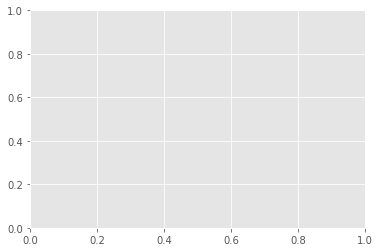

In [68]:
plt.scatter(x, y, c = y_train)
plt.show()